In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

# Define start and end dates
start_date = dt.datetime(2013, 1, 1)
end_date = dt.datetime(2023, 1, 1)

# Define tickers
tickers = ["CPALTT01USM657N", "UNRATE", "PPIACO", "M2SL"]

# Pull data using DataReader
data = web.DataReader(tickers, "fred", start_date, end_date)


# Save data to CSV file
data.to_csv("fred_data.csv")


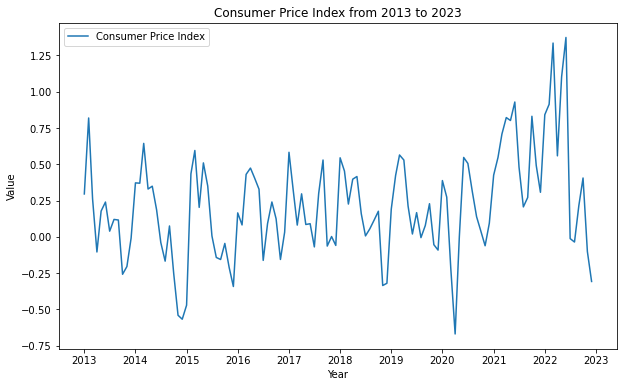

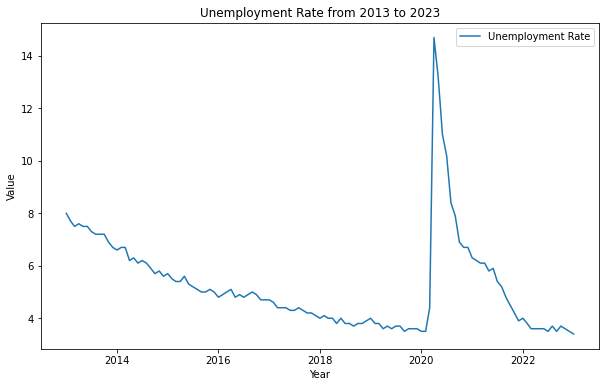

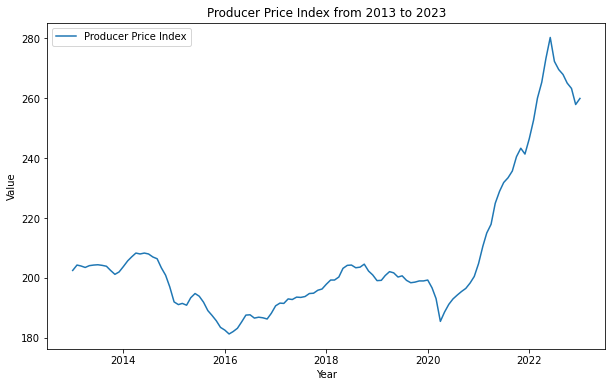

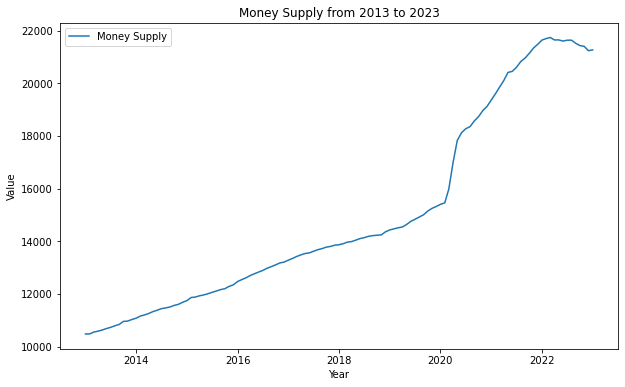

In [7]:
#read in data
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt

# Define the start and end dates for the data
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2023, 1, 1)

# Define the ticker symbols for the economic indicators
tickers = ['CPALTT01USM657N', 'UNRATE', 'PPIACO', 'M2SL']

# Use pandas datareader to fetch the data from FRED
data = web.DataReader(tickers, 'fred', start, end)

# Create a line chart for each economic indicator
plt.figure(figsize=(10, 6))
plt.plot(data['CPALTT01USM657N'], label='Consumer Price Index')
plt.title('Consumer Price Index from 2013 to 2023')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['UNRATE'], label='Unemployment Rate')
plt.title('Unemployment Rate from 2013 to 2023')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['PPIACO'], label='Producer Price Index')
plt.title('Producer Price Index from 2013 to 2023')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['M2SL'], label='Money Supply')
plt.title('Money Supply from 2013 to 2023')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


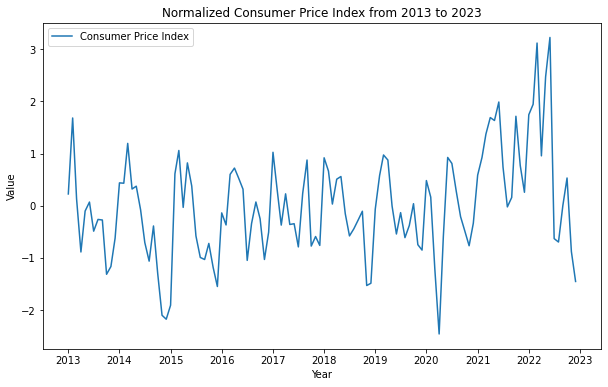

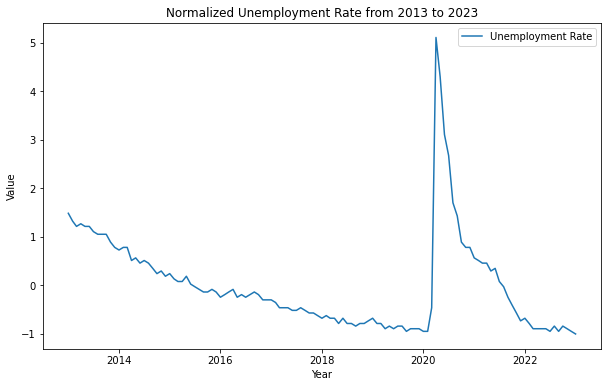

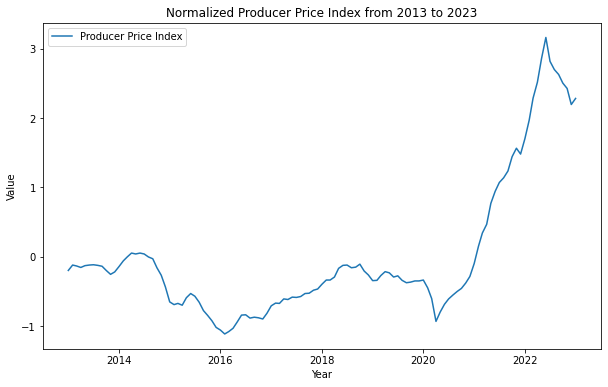

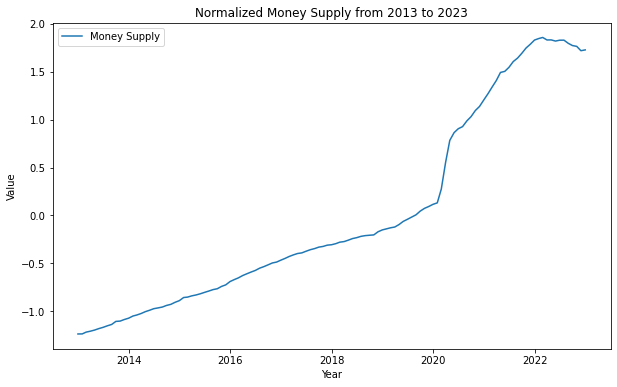

In [8]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the start and end dates for the data
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2023, 1, 1)

# Define the ticker symbols for the economic indicators
tickers = ['CPALTT01USM657N', 'UNRATE', 'PPIACO', 'M2SL']

# Use pandas datareader to fetch the data from FRED
data = web.DataReader(tickers, 'fred', start, end)

# Normalize each economic indicator using StandardScaler
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Create a line chart for each economic indicator
plt.figure(figsize=(10, 6))
plt.plot(data_normalized['CPALTT01USM657N'], label='Consumer Price Index')
plt.title('Normalized Consumer Price Index from 2013 to 2023')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_normalized['UNRATE'], label='Unemployment Rate')
plt.title('Normalized Unemployment Rate from 2013 to 2023')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_normalized['PPIACO'], label='Producer Price Index')
plt.title('Normalized Producer Price Index from 2013 to 2023')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_normalized['M2SL'], label='Money Supply')
plt.title('Normalized Money Supply from 2013 to 2023')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


In [14]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the start and end dates for the data
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2023, 1, 1)

# Define the ticker symbols for the economic indicators
tickers = ['CPALTT01USM657N', 'UNRATE', 'PPIACO', 'M2SL']

# Use pandas datareader to fetch the data from FRED
data = web.DataReader(tickers, 'fred', start, end)

# Normalize each economic indicator using StandardScaler
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Define a function to fit a SARIMA model for a given economic indicator
def fit_sarima(data, order, sorder, seasonal=True):
    if seasonal:
        model = SARIMAX(data, order=order, seasonal_order=sorder, enforce_stationarity=False, enforce_invertibility=False)
    else:
        model = SARIMAX(data, order=order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    return model_fit

# Fit a SARIMA model for each economic indicator
for ticker in tickers:
    print('Fitting SARIMA model for', ticker)
    data_ticker = data_normalized[ticker].dropna()
    order = (1, 1, 1)
    sorder = (1, 1, 1, 12)
    model = fit_sarima(data_ticker, order, sorder, seasonal=True)
    print('SARIMA model for', ticker, ':', model.summary())


Fitting SARIMA model for CPALTT01USM657N
SARIMA model for CPALTT01USM657N :                                      SARIMAX Results                                      
Dep. Variable:                    CPALTT01USM657N   No. Observations:                  120
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -110.162
Date:                            Sat, 04 Mar 2023   AIC                            230.325
Time:                                    00:05:56   BIC                            242.988
Sample:                                01-01-2013   HQIC                           235.438
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5358      0.107      

In [15]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

# Define the start and end dates for the data
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2023, 1, 1)

# Define the ticker symbols for the economic indicators
tickers = ['CPALTT01USM657N', 'UNRATE', 'PPIACO', 'M2SL']

# Use pandas datareader to fetch the data from FRED
data = web.DataReader(tickers, 'fred', start, end)

# Normalize each economic indicator using StandardScaler
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Define a function to fit a SARIMA model for a given economic indicator
def fit_sarima(data, seasonal=True):
    model = auto_arima(data, seasonal=seasonal, m=12, suppress_warnings=True, error_action='ignore')
    return model

# Fit a SARIMA model for each economic indicator
for ticker in tickers:
    print('Fitting SARIMA model for', ticker)
    data_ticker = data_normalized[ticker].dropna()
    model = fit_sarima(data_ticker, seasonal=True)
    print('SARIMA model for', ticker, ':', model.summary())


Fitting SARIMA model for CPALTT01USM657N
SARIMA model for CPALTT01USM657N :                                       SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  120
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -147.698
Date:                              Sat, 04 Mar 2023   AIC                            303.396
Time:                                      00:13:50   BIC                            314.512
Sample:                                  01-01-2013   HQIC                           307.910
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1321 

In [19]:
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import pickle

# Define the start and end dates for the data
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2023, 1, 1)

# Define the ticker symbols for the economic indicators
tickers = ['CPALTT01USM657N', 'UNRATE', 'PPIACO', 'M2SL']

# Use pandas datareader to fetch the data from FRED
data = web.DataReader(tickers, 'fred', start, end)

# Normalize the data using StandardScaler
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=tickers, index=data.index)

# Define a function to fit a SARIMA model and return the best parameters
def fit_sarima(data, seasonal=True):
    model = auto_arima(data, seasonal=seasonal, m=12, suppress_warnings=True, error_action='ignore')
    return model

# Fit a SARIMA model and save the model for each economic indicator
for ticker in tickers:
    print(ticker)
    # Get the normalized data for the current ticker
    data_ticker = data_normalized[ticker].dropna()
    
    # Fit a SARIMA model for the current ticker
    model_ticker = fit_sarima(data_ticker, seasonal=True)
    
    # Save the SARIMA model for the current ticker
    with open(f'sarima_{ticker.lower()}.pickle', 'wb') as f:
        pickle.dump(model_ticker, f)


CPALTT01USM657N
UNRATE
PPIACO
M2SL


In [23]:
import pandas as pd
from pmdarima.arima import auto_arima

def auto_arima_forecast(model, n_periods):
    """
    Generates a forecast using an auto_arima model object for a specified number of periods.
    
    Parameters:
        - model (pmdarima.arima.AutoARIMA): The auto_arima model object to use for forecasting.
        - n_periods (int): The number of periods to forecast.
    
    Returns:
        - forecast (pandas.Series): A pandas Series object containing the forecasted values.
    """
    # Generate the forecast
    forecast = model.predict(n_periods=n_periods)
    
    # Convert the forecast to a pandas Series
    forecast = pd.Series(forecast, name="forecast")
    
    return forecast




In [25]:
import pickle

# Load the saved models from the pickle files
with open('sarima_cpaltt01usm657n.pickle', 'rb') as f:
    sarima_cpaltt01usm657n = pickle.load(f)
    
with open('sarima_m2sl.pickle', 'rb') as f:
    sarima_m2sl = pickle.load(f)
    
with open('sarima_ppiaco.pickle', 'rb') as f:
    sarima_ppiaco = pickle.load(f)
    
with open('sarima_unrate.pickle', 'rb') as f:
    sarima_unrate = pickle.load(f)

# Generate 12-step forecasts for each model using the auto_arima_forecast function
cpaltt_forecast = auto_arima_forecast(sarima_cpaltt01usm657n, n_periods=12)
m2sl_forecast = auto_arima_forecast(sarima_m2sl, n_periods=12)
ppiaco_forecast = auto_arima_forecast(sarima_ppiaco, n_periods=12)
unrate_forecast = auto_arima_forecast(sarima_unrate, n_periods=12)

# Print the forecasts
print(cpaltt_forecast)
print(m2sl_forecast)
print(ppiaco_forecast)
print(unrate_forecast)



2023-01-01   -0.435678
2023-02-01   -0.238468
2023-03-01   -0.178751
2023-04-01   -0.615926
2023-05-01   -0.284690
2023-06-01   -0.150144
2023-07-01   -1.003715
2023-08-01   -1.098385
2023-09-01   -0.908527
2023-10-01   -0.850446
2023-11-01   -1.421737
2023-12-01   -1.493024
Freq: MS, Name: forecast, dtype: float64
2023-02-01    1.752697
2023-03-01    1.785194
2023-04-01    1.802440
2023-05-01    1.821651
2023-06-01    1.838662
2023-07-01    1.858057
2023-08-01    1.873869
2023-09-01    1.883446
2023-10-01    1.894350
2023-11-01    1.908641
2023-12-01    1.914888
2024-01-01    1.934115
Freq: MS, Name: forecast, dtype: float64
2023-02-01    2.367990
2023-03-01    2.459290
2023-04-01    2.523477
2023-05-01    2.614847
2023-06-01    2.694453
2023-07-01    2.606394
2023-08-01    2.576461
2023-09-01    2.558354
2023-10-01    2.526484
2023-11-01    2.506632
2023-12-01    2.446901
2024-01-01    2.469534
Freq: MS, Name: forecast, dtype: float64
2023-02-01   -0.856958
2023-03-01   -0.732328
202

In [ ]:
#retrain the models with each of the ideal parameters

In [3]:
import pandas as pd
import pickle

# Read in fred_data.csv
df = pd.read_csv('fred_data.csv', index_col='DATE', parse_dates=True)

# Read in the models from the pickle files
with open('sarima_cpaltt01usm657n.pickle', 'rb') as f:
    model_cpaltt01usm657n = pickle.load(f)
with open('sarima_m2sl.pickle', 'rb') as f:
    model_m2sl = pickle.load(f)
with open('sarima_ppiaco.pickle', 'rb') as f:
    model_ppiaco = pickle.load(f)
with open('sarima_unrate.pickle', 'rb') as f:
    model_unrate = pickle.load(f)

# Forecast using model.predict() and append to the overall series
num_periods = 12
df_cpaltt01usm657n = model_cpaltt01usm657n.predict(n_periods=num_periods)
df_cpaltt01usm657n = pd.DataFrame(df_cpaltt01usm657n, index=pd.date_range(start=df.index[-1], periods=num_periods, freq='MS'), columns=['CPALTT01USM657N'])
df = pd.concat([df, df_cpaltt01usm657n])

df_m2sl = model_m2sl.predict(n_periods=num_periods)
df_m2sl = pd.DataFrame(df_m2sl, index=pd.date_range(start=df.index[-1], periods=num_periods, freq='MS'), columns=['M2SL'])
df = pd.concat([df, df_m2sl])

df_ppiaco = model_ppiaco.predict(n_periods=num_periods)
df_ppiaco = pd.DataFrame(df_ppiaco, index=pd.date_range(start=df.index[-1], periods=num_periods, freq='MS'), columns=['PPIACO'])
df = pd.concat([df, df_ppiaco])

df_unrate = model_unrate.predict(n_periods=num_periods)
df_unrate = pd.DataFrame(df_unrate, index=pd.date_range(start=df.index[-1], periods=num_periods, freq='MS'), columns=['UNRATE'])
df = pd.concat([df, df_unrate])

# Save to a new CSV file
df.to_csv('fred_data_with_forecasts.csv')


In [9]:
df['CPI'].dropna()

2013-01-01    0.295730
2013-02-01    0.819003
2013-03-01    0.261451
2013-04-01   -0.103964
2013-05-01    0.178041
                ...   
2022-08-01   -0.035440
2022-09-01    0.215078
2022-10-01    0.405649
2022-11-01   -0.101003
2022-12-01   -0.307009
Name: CPI, Length: 120, dtype: float64

In [4]:
import pandas as pd
import numpy as np
import pickle

# read in fred_data.csv
df = pd.read_csv('fred_data.csv', index_col=0, parse_dates=True)

# read in pickle files
with open('sarima_cpaltt01usm657n.pickle', 'rb') as f:
    sarima_cpaltt01usm657n = pickle.load(f)
    
with open('sarima_m2sl.pickle', 'rb') as f:
    sarima_m2sl = pickle.load(f)
    
with open('sarima_ppiaco.pickle', 'rb') as f:
    sarima_ppiaco = pickle.load(f)
    
with open('sarima_unrate.pickle', 'rb') as f:
    sarima_unrate = pickle.load(f)

# forecast using model.predict
num_periods = 12
cpaltt01usm657n_forecast = sarima_cpaltt01usm657n.predict(n_periods=num_periods)
m2sl_forecast = sarima_m2sl.predict(n_periods=num_periods)
ppiaco_forecast = sarima_ppiaco.predict(n_periods=num_periods)
unrate_forecast = sarima_unrate.predict(n_periods=num_periods)

# create a date range for the forecasted periods
last_date = df.index[-1]
date_range = pd.date_range(start=last_date, periods=num_periods+1, freq='MS')[1:]

# create dataframes for each forecasted series
cpaltt01usm657n_df = pd.DataFrame(cpaltt01usm657n_forecast, index=date_range, columns=['CPALTt01USM657N'])
m2sl_df = pd.DataFrame(m2sl_forecast, index=date_range, columns=['M2SL'])
ppiaco_df = pd.DataFrame(ppiaco_forecast, index=date_range, columns=['PPIACO'])
unrate_df = pd.DataFrame(unrate_forecast, index=date_range, columns=['UNRATE'])

# append the forecasted dataframes to the overall dataframe
df = pd.concat([df, cpaltt01usm657n_df, m2sl_df, ppiaco_df, unrate_df], axis=1)


In [5]:
df

,CPALTT01USM657N,UNRATE,PPIACO,M2SL,CPALTt01USM657N,M2SL,PPIACO,UNRATE
2013-01-01,0.295730,8.0,202.5,10479.5,NaN,NaN,NaN,NaN
2013-02-01,0.819003,7.7,204.3,10482.0,NaN,NaN,NaN,NaN
2013-03-01,0.261451,7.5,204.0,10550.0,NaN,NaN,NaN,NaN
2013-04-01,-0.103964,7.6,203.5,10585.9,NaN,NaN,NaN,NaN
2013-05-01,0.178041,7.5,204.1,10628.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-09-01,NaN,NaN,NaN,NaN,-0.908527,1.883446,2.558354,-0.285220
2023-10-01,NaN,NaN,NaN,NaN,-0.850446,1.894350,2.526484,-0.243739
2023-11-01,NaN,NaN,NaN,NaN,-1.421737,1.908641,2.506632,-0.208292
2023-12-01,NaN,NaN,NaN,NaN,-1.493024,1.914888,2.446901,-0.177999


In [10]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Read in fred_data.csv
fred_data = pd.read_csv('fred_data.csv', index_col=0, parse_dates=True)

# Define periods to forecast
n_periods = 12  # forecast 12 periods (12 months)

# Load the saved models
sarima_cpaltt01usm657n = joblib.load('sarima_cpaltt01usm657n.pickle')
sarima_m2sl = joblib.load('sarima_m2sl.pickle')
sarima_ppiaco = joblib.load('sarima_ppiaco.pickle')
sarima_unrate = joblib.load('sarima_unrate.pickle')

# Forecast using auto_arima models
cpialtt01usm657n_forecast = sarima_cpaltt01usm657n.predict(n_periods=n_periods)
m2sl_forecast = sarima_m2sl.predict(n_periods=n_periods)
ppiaco_forecast = sarima_ppiaco.predict(n_periods=n_periods)
unrate_forecast = sarima_unrate.predict(n_periods=n_periods)

# Create DataFrames for each forecast with appropriate column name
cpialtt01usm657n_df = pd.DataFrame(cpialtt01usm657n_forecast, columns=['cpialtt01usm657n'])
m2sl_df = pd.DataFrame(m2sl_forecast, columns=['m2sl'])
ppiaco_df = pd.DataFrame(ppiaco_forecast, columns=['ppiaco'])
unrate_df = pd.DataFrame(unrate_forecast, columns=['unrate'])

# Append the forecasts to the fred_data DataFrame
fred_data = pd.concat([fred_data, cpialtt01usm657n_df, m2sl_df, ppiaco_df, unrate_df], axis=1)

# Save the updated DataFrame as a new csv file
fred_data.to_csv('fred_data_forecasts.csv')



In [13]:
import pandas as pd
import numpy as np
import pickle
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

# Load the fred_data.csv file
fred_data = pd.read_csv('fred_data.csv', index_col=0, parse_dates=True)

# Load the SARIMA models from the pickle files
with open('sarima_cpaltt01usm657n.pickle', 'rb') as f:
    model_cpaltt = pickle.load(f)

with open('sarima_m2sl.pickle', 'rb') as f:
    model_m2sl = pickle.load(f)

with open('sarima_ppiaco.pickle', 'rb') as f:
    model_ppiaco = pickle.load(f)

with open('sarima_unrate.pickle', 'rb') as f:
    model_unrate = pickle.load(f)

# Separate each column into different sets
cpi = fred_data['CPALTT01USM657N'].copy()
unemployment_rate = fred_data['UNRATE'].copy()
producer_price_index = fred_data['PPIACO'].copy()
money_supply = fred_data['M2SL'].copy()

# Forecast with the auto_arima models for each set and append to the series
cpi_forecast = model_cpaltt.predict(n_periods=24)
cpi = cpi.append(pd.Series(cpi_forecast, index=pd.date_range(start=cpi.index[-1], periods=len(cpi_forecast)+1, freq='MS')))

unemployment_forecast = model_unrate.predict(n_periods=24)
unemployment_rate = unemployment_rate.append(pd.Series(unemployment_forecast, index=pd.date_range(start=unemployment_rate.index[-1], periods=len(unemployment_forecast)+1, freq='MS')))

producer_forecast = model_ppiaco.predict(n_periods=24)
producer_price_index = producer_price_index.append(pd.Series(producer_forecast, index=pd.date_range(start=producer_price_index.index[-1], periods=len(producer_forecast)+1, freq='MS')))

money_forecast = model_m2sl.predict(n_periods=24)
money_supply = money_supply.append(pd.Series(money_forecast, index=pd.date_range(start=money_supply.index[-1], periods=len(money_forecast)+1, freq='MS')))

# Combine the forecasts into a single dataframe
forecasts = pd.DataFrame({'CPALTT01USM657N': cpi_forecast,
                          'UNRATE': unemployment_forecast,
                          'PPIACO': producer_forecast,
                          'M2SL': money_forecast},
                         index=pd.date_range(start=cpi.index[-1], periods=len(cpi_forecast)+1, freq='MS'))

# Concatenate the forecasts onto the original fred_data
fred_data_forecasts = pd.concat([fred_data, forecasts], axis=0)

# Save the combined dataframe to a new csv file
fred_data_forecasts


C:\Users\baker\AppData\Local\Temp\ipykernel_23572\3320296374.py:31: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cpi = cpi.append(pd.Series(cpi_forecast, index=pd.date_range(start=cpi.index[-1], periods=len(cpi_forecast)+1, freq='MS')))
C:\Users\baker\AppData\Local\Temp\ipykernel_23572\3320296374.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unemployment_rate = unemployment_rate.append(pd.Series(unemployment_forecast, index=pd.date_range(start=unemployment_rate.index[-1], periods=len(unemployment_forecast)+1, freq='MS')))
C:\Users\baker\AppData\Local\Temp\ipykernel_23572\3320296374.py:37: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_price_index = producer_price_index.append(pd.Series(producer_forecast, 

,CPALTT01USM657N,UNRATE,PPIACO,M2SL
2013-01-01,0.295730,8.0,202.5,10479.5
2013-02-01,0.819003,7.7,204.3,10482.0
2013-03-01,0.261451,7.5,204.0,10550.0
2013-04-01,-0.103964,7.6,203.5,10585.9
2013-05-01,0.178041,7.5,204.1,10628.2
...,...,...,...,...
2026-09-01,NaN,NaN,NaN,NaN
2026-10-01,NaN,NaN,NaN,NaN
2026-11-01,NaN,NaN,NaN,NaN
2026-12-01,NaN,NaN,NaN,NaN


In [1]:
#create the dashboard, allow user to select the series, and add each one to a line plot
import pandas as pd
import pandas_datareader as pdr
from sklearn.preprocessing import StandardScaler

# Set start and end dates
start_date = '2013-01-01'
end_date = '2023-01-01'

# Define FRED codes for the series
series_codes = ['CPALTT01USM657N', 'UNRATE', 'PPIACO', 'M2SL']

# Use pandas datareader to pull the data
data = pdr.DataReader(series_codes, 'fred', start_date, end_date)

# Drop any missing values
data.dropna(inplace=True)

# Standardize the data using sklearn's StandardScaler
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Save the data to a csv file
data_standardized.to_csv('fred_data_standardized.csv')


C:\Users\baker\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data_standardized

,CPALTT01USM657N,UNRATE,PPIACO,M2SL
DATE,,,,
2013-01-01,0.225196,1.476265,-0.180530,-1.231768
2013-02-01,1.681138,1.314038,-0.101406,-1.231076
2013-03-01,0.129817,1.205887,-0.114594,-1.212240
2013-04-01,-0.886905,1.259963,-0.136573,-1.202296
2013-05-01,-0.102261,1.205887,-0.110198,-1.190579
...,...,...,...,...
2022-08-01,-0.696245,-0.848988,2.766650,1.858750
2022-09-01,0.000792,-0.957139,2.694208,1.825483
2022-10-01,0.531032,-0.848988,2.567962,1.802105
